# Perceptron
Invented by Frank Rosenblatt

- [Imports](#imports)
- [Simple Perceptron without Learning](#simple-perceptron-without-learning)
- [Simple Perceptron with Learning](#simple-perceptron-with-learning)
  - With Perceptron as Class and a bit more beautiful
  - With OR, AND and XOR (+ visualization)
- [Conclusion](#conclusion)



---

### Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Simple Perceptron without Learning



A perceptron computes the output based on a weighted sum of inputs and an activation function:

**Output (y):**

<p>
  y = f( (∑<sub>i=1</sub><sup>n</sup> w<sub>i</sub> x<sub>i</sub>) + b) = f(w1 * x1 + w2 * x2 + ... + wn * xn + b)
</p>

**Explanation:**
- x1, x2, ..., xn: Input values
- w1, w2, ..., wn: Weights
- b: Bias (threshold)
- f: Activation function (e.g., a step function)


-> The first value is the bias, it is just an addition without multiplication with the input. For that it gets always multiplied by 1.

Definitions

In [2]:
# 4 different input vectors with the bias value at the beginning
X = np.array([
    [1, 0, 0],
    [1, 0, 1],
    [1, 1, 0],
    [1, 1, 1]
    ])

# Groundtruth
y = np.array([0, 1, 1, 1])

init_weights = np.array([-1, 1, 1])

def heaviside_activation_func(sum_value):
    """
    Simple linear step function

    Input: sum of weighted neurons multiplied by the input
    Output: 0 or 1
    """
    if sum_value >= 0:
        return 1
    else:
        return 0

def perceptron_calc(X, weights):
    # calculate the inner product
    scalar = np.dot(weights, X)

    # apply activation function
    scalar = heaviside_activation_func(scalar)

    return scalar

In [3]:
absolute_error = 0

for i, x in enumerate(X):
    absolute_error += np.abs(y[i] - perceptron_calc(x, init_weights))

absolute_error

np.int64(0)

No Errors, because we choose the optimal weights for the bias, and the 2 neurons.

### Simple Perceptron **with** Learning

How to learn neural networks: Using labeled data (with ground truth) to adjust the weights to decrease the error.

Decreasing the error also called **convergence**.

-> Now as class implemented and the bias is used differently.

In [4]:
class Perceptron:
    def __init__(self, activation_func):
        self.weights = np.random.randint(-1, 2, 2)    # x1, x2
        self.bias = np.random.randint(-1, 2, 1)
        self.activation_func = activation_func

    def fit(self, X, y, epochs=1, should_print=False):    # train
        output_print = f"\n{'-'*24}\nPerceptron Training:\n    - Epochs: {epochs}\n    - Weights: {self.weights}\n    - Bias: {self.bias}"
        for cur_epoch in range(epochs):
            output_print += f"\n\n{'#'*24}\n{cur_epoch+1}. Epoch:"
            progress = (cur_epoch+1)/epochs
            blocks = 20
            output_print += f"\n    -> Progress: |{'#'*int(blocks*progress)}{' '*int(blocks*(1-progress))}|"

            # shuffle data
            permutation = np.random.permutation(len(X))
            X_shuffled = X[permutation]
            y_shuffled = y[permutation]

            for cur_X, cur_y in zip(X_shuffled, y_shuffled):
                # # add bias value
                # cur_X = np.insert(cur_X, 0, 1)

                # predict and calc error
                y_ = self.activation_func( np.dot(self.weights, cur_X) + self.bias )
                error = cur_y - y_

                # adjust weights
                delta_weights = error*cur_X
                self.weights = self.weights+delta_weights

                self.bias = self.bias + (error)

                output_print += f"\n\n - X:{cur_X}, y:{cur_y}, prediction:{y_}, error:{error}"
                output_print += f"\n    -> new weights: {self.weights}"
                output_print += f"\n    -> new bias: {self.bias}"

        if should_print:
            print(output_print)
            

    def predict(self, X):
        y_ = np.dot(self.weights, X) + self.bias
        y_ = self.activation_func(y_)

        return y_

    def eval(self, X, y):
        absolute_error = 0

        for i, x in enumerate(X):
            absolute_error += np.abs(y[i] - self.predict(x))

        return absolute_error

In [5]:
# 4 different input vectors with the bias value at the beginning
X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
        ])

# Groundtruth
y = np.array([0, 1, 1, 1])

In [6]:
def heaviside_activation_func(sum_value):
    """
    Simple linear step function

    Input: sum of weighted neurons multiplied by the input
    Output: 0 or 1
    """
    if sum_value >= 0:
        return 1
    else:
        return 0

In [7]:
model = Perceptron(heaviside_activation_func)

print(f"Absolute Error, before training/learning: {model.eval(X, y)}")

model.fit(X=X, y=y, epochs=5, should_print=True)
print(f"\nAbsolute Error, after training/learning: {model.eval(X, y)}")

Absolute Error, before training/learning: 3

------------------------
Perceptron Training:
    - Epochs: 5
    - Weights: [-1  0]
    - Bias: [-1]

########################
1. Epoch:
    -> Progress: |####                |

 - X:[0 1], y:1, prediction:0, error:1
    -> new weights: [-1  1]
    -> new bias: [0]

 - X:[1 0], y:1, prediction:0, error:1
    -> new weights: [0 1]
    -> new bias: [1]

 - X:[0 0], y:0, prediction:1, error:-1
    -> new weights: [0 1]
    -> new bias: [0]

 - X:[1 1], y:1, prediction:1, error:0
    -> new weights: [0 1]
    -> new bias: [0]

########################
2. Epoch:
    -> Progress: |########            |

 - X:[0 0], y:0, prediction:1, error:-1
    -> new weights: [0 1]
    -> new bias: [-1]

 - X:[1 1], y:1, prediction:1, error:0
    -> new weights: [0 1]
    -> new bias: [-1]

 - X:[0 1], y:1, prediction:1, error:0
    -> new weights: [0 1]
    -> new bias: [-1]

 - X:[1 0], y:1, prediction:0, error:1
    -> new weights: [1 1]
    -> new bias: [0

This simple Perceptron can learn every linear problem, like AND, OR, but have problems with unlinear problems like XOR. 

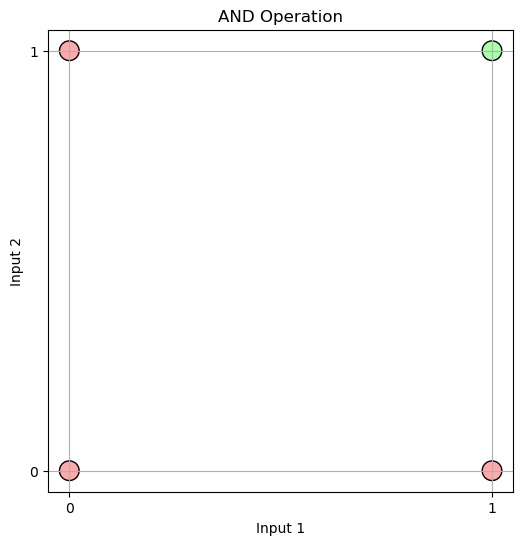

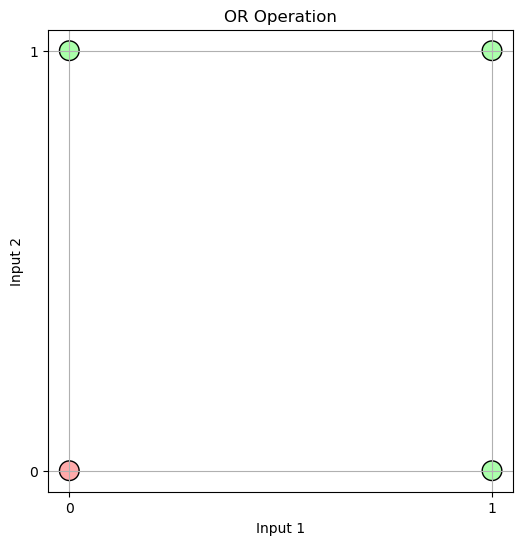

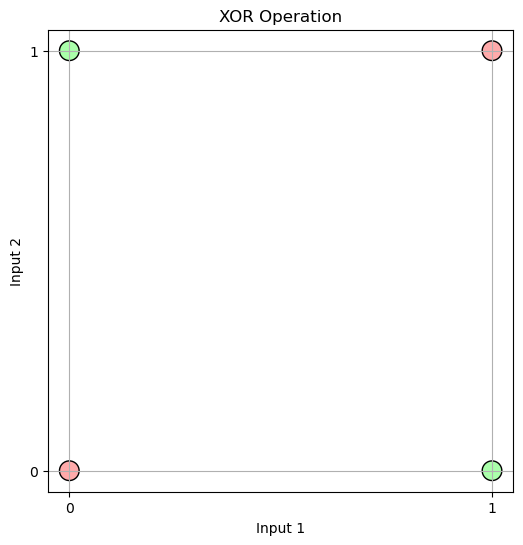

In [8]:
# Define input space (all combinations of 0 and 1)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Define labels for AND, OR, XOR
and_labels = np.array([0, 0, 0, 1])
or_labels = np.array([0, 1, 1, 1])
xor_labels = np.array([0, 1, 1, 0])

# Function to plot the truth table for a given operation
def plot_truth_table(X, labels, title):
    plt.figure(figsize=(6, 6))
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA'])
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap, s=200, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.grid(True)
    plt.show()

def plot_truth_table_with_model(X, labels, model, title):
    plt.figure(figsize=(6, 6))
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA'])
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=cmap, s=200, edgecolor='k', marker='o')

    # plot model
    w1, w2 = model.weights  # Assuming model.weights is a 2D vector [w1, w2]
    b = model.bias[0]  # Assuming model.bias is a scalar
    #     Calculate slope and intercept of the decision boundary
    slope = -(w1 / w2)
    intercept = -(b / w2)
    #     Create x values for the decision boundary line (covering the whole plot range)
    x_vals = np.linspace(-0.5, 1.5, 100)
    y_vals = slope * x_vals + intercept
    #     Plot the decision boundary
    plt.plot(x_vals, y_vals, 'k--', label="Decision Boundary")

    plt.title(title)
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.xticks([0, 1])
    plt.yticks([0, 1])
    plt.grid(True)
    plt.show()

# Plot the truth tables for AND, OR, and XOR
plot_truth_table(X, and_labels, 'AND Operation')
plot_truth_table(X, or_labels, 'OR Operation')
plot_truth_table(X, xor_labels, 'XOR Operation')



Absolute Error for OR: 0


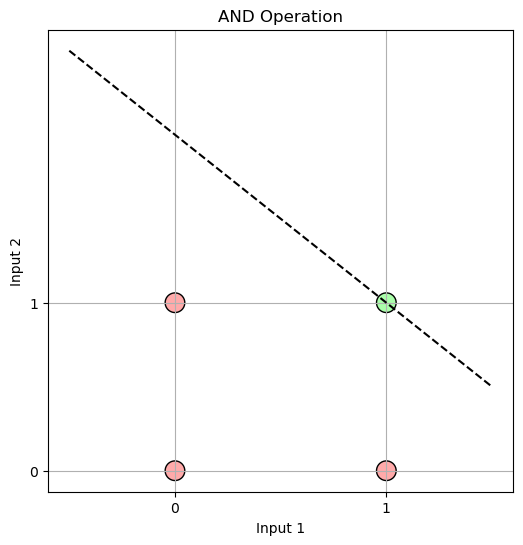

In [9]:
model = Perceptron(heaviside_activation_func)
model.fit(X=X, y=and_labels, epochs=10, should_print=False)
print(f"\nAbsolute Error for OR: {model.eval(X, and_labels)}")
plot_truth_table_with_model(X, and_labels, model, 'AND Operation')


Absolute Error for OR: 0


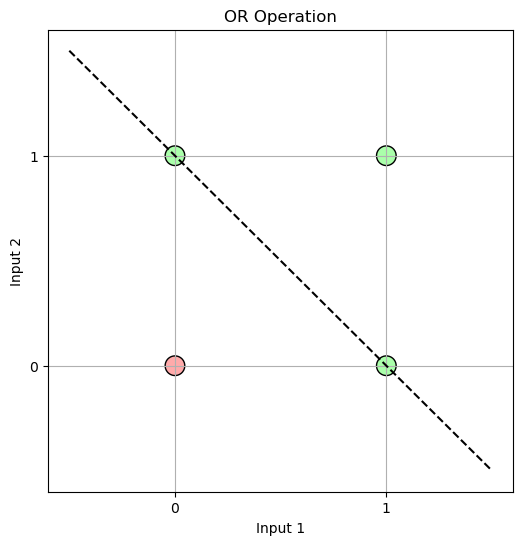

In [10]:
model = Perceptron(heaviside_activation_func)
model.fit(X=X, y=or_labels, epochs=10, should_print=False)
print(f"\nAbsolute Error for OR: {model.eval(X, or_labels)}")
plot_truth_table_with_model(X, or_labels, model, 'OR Operation')


Absolute Error for XOR: 3


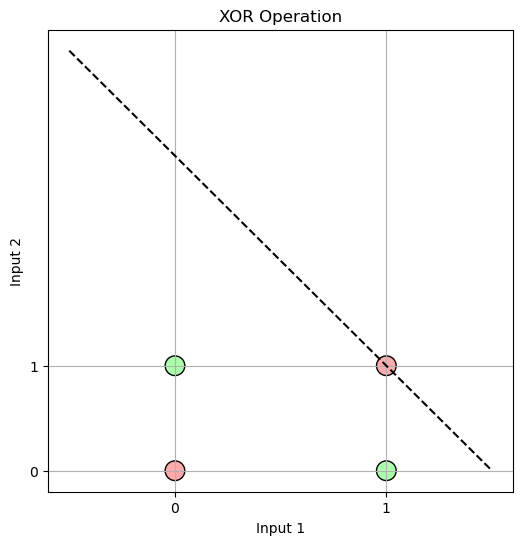

In [11]:
model = Perceptron(heaviside_activation_func)
model.fit(X=X, y=and_labels, epochs=100, should_print=False)
print(f"\nAbsolute Error for XOR: {model.eval(X, xor_labels)}")
plot_truth_table_with_model(X, xor_labels, model, 'XOR Operation')

### Conclusion

- Neural networks are math function approximators. They adjust weights to find a good fitting function given input-output-pairs.

- The amount of neuron-layers and the type of activation function decides which kinds of math functions can be solved/learned.

- The process from a neural network which changes it's weights to come closer to the real function of the data calls convergence.

- The basic calculations of every NN is pretty simple -> dot-products and summarization + applying activation function:

<p>
  y = f( (∑<sub>i=1</sub><sup>n</sup> w<sub>i</sub> x<sub>i</sub>) + b) = f(w1 * x1 + w2 * x2 + ... + wn * xn + b)
</p>